In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import BoxStyle
from matplotlib.path import Path
from matplotlib import rcParams
rcParams['mathtext.default'] = 'regular'

%matplotlib inline

In [35]:
light_response_df = pd.read_csv('../data/lightResponseData.csv')

# note, during the curve of line 1.10.19 the licor had a problem half way through and the leaf was in darkness for 5-10 mins
lr_df = light_response_df[~light_response_df['plant'].isin(['1.10.19_5'])]

# Use the first measurment at the highest light level
lr_df = lr_df[~lr_df['which_1500'].isin(['second'])]

lr_df['PhiPS2'] = pd.to_numeric(lr_df.PhiPS2, errors='coerce')
lr_df['ETR'] = pd.to_numeric(lr_df.ETR, errors='coerce')
lr_df['NPQ'] = pd.to_numeric(lr_df.NPQ, errors='coerce')
lr_df['qP'] = pd.to_numeric(lr_df.qP, errors='coerce')
lr_df['qN'] = pd.to_numeric(lr_df.qN, errors='coerce')

grouped_df = lr_df.groupby(['Q_rounded', 'plot', 'type']).agg({'A': ['mean', 'std'], 'PhiPS2': ['mean', 'std'], 
                                                               'ETR': ['mean', 'std'], 'NPQ': ['mean', 'std'], 'qP': ['mean', 'std'],
                                                               'qN': ['mean', 'std']})
grouped_df.columns = ['A_mean', 'A_std', 'PhiPS2_mean', 'PhiPS2_std', 'ETR_mean', 'ETR_std', 'NPQ_mean', 'NPQ_std', 'qP_mean', 'qP_std', 'qN_mean', 'qN_std']
grouped_df = grouped_df.reset_index()

In [36]:
class ExtendedTextBox(BoxStyle._Base):
    """
    An Extended Text Box that expands to the axes limits 
                        if set in the middle of the axes
    """

    def __init__(self, pad=0.3, width=500.):
        """
        width: 
            width of the textbox. 
            Use `ax.get_window_extent().width` 
                   to get the width of the axes.
        pad: 
            amount of padding (in vertical direction only)
        """
        self.width=(width*0.9)
        self.pad = pad
        super(ExtendedTextBox, self).__init__()

    def transmute(self, x0, y0, width, height, mutation_size):
        """
        x0 and y0 are the lower left corner of original text box
        They are set automatically by matplotlib
        """
        # padding
        pad = mutation_size * self.pad

        # we add the padding only to the box height
        height = height + 2.*pad
        # boundary of the padded box
        y0 = y0 - pad
        y1 = y0 + height
        _x0 = x0
        x0 = _x0 +width /2. - self.width/2.
        x1 = _x0 +width /2. + self.width/2.

        cp = [(x0, y0),
              (x1, y0), (x1, y1), (x0, y1),
              (x0, y0)]

        com = [Path.MOVETO,
               Path.LINETO, Path.LINETO, Path.LINETO,
               Path.CLOSEPOLY]

        path = Path(cp, com)

        return path
    

# register the custom style
BoxStyle._style_list["ext"] = ExtendedTextBox

### Light response curves

In [37]:
def plot_curve(df, y, y_std, y_label, file_name):
    # sns.plotting_context()
    sns.set(font_scale = 1.4, font="Arial")
    sns.set_style(style='ticks')

    # Choose hue colour palette
    colours = ['#000000', '#009E73']

    grid = sns.FacetGrid(df, col="plot", col_order=['1.10.18', '1.10.19', '1.10.32', '1.12.2'], hue="type", hue_order=['wt', 'mutant'],
                         palette=colours, col_wrap=2, size=4, aspect=1, hue_kws=dict(marker=["D", "o"]))

    grid.map(plt.errorbar, "Q_rounded", y, y_std, markersize=5, alpha=0.8, linewidth=0.5, linestyle='-', elinewidth=1, capsize=3, 
            markeredgecolor=None, markeredgewidth=1)


    # Adjust position abd labels of legend
    legend_ax = grid.axes.flat[3]
    handles, labels = legend_ax.get_legend_handles_labels()
    leg = plt.legend(handles[0:2],['Wild-type', 'Mutant'], bbox_to_anchor=(1.05, 1.5), loc=2, borderaxespad=0.)


    # Set axis labels
    grid.set_axis_labels(x_var="PFD ($\mu$mol m$^{-2}$s$^{-1}$)", y_var=y_label)


    # Set titles 
    grid.set_titles("{col_name}")
    for ax in grid.axes:
        # set the title position to the horizontal center (0.5) of the axes
        title = ax.set_title(ax.get_title(), position=(.5, 1.0), backgroundcolor="silver", color='black', 
                             size=14)
        # set the box style of the title text box to our custom box
        bb = title.get_bbox_patch()
        # use the axes' width as width of the text box
        bb.set_boxstyle("ext", pad=0.4, width=ax.get_window_extent().width )

    # plt.savefig(file_name, transparent=True, dpi=300, bbox_inches='tight')


/Users/rona/miniconda3/envs/relocalisations_C4/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


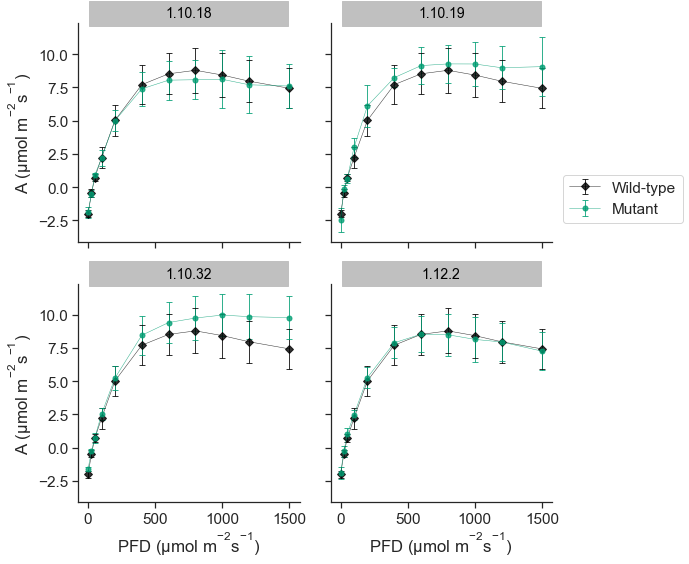

In [10]:
# Assimilation light response curve
plot_curve(grouped_df, "A_mean", "A_std", "A ($\mu$mol m$^{-2}$s$^{-1}$)", "../figures/lrCurves.pdf")

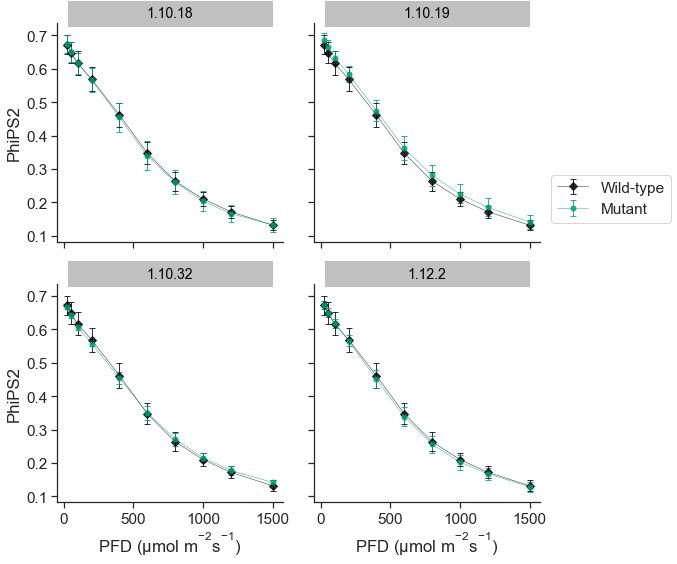

In [11]:
# PhiPS2
plot_curve(grouped_df, "PhiPS2_mean", "PhiPS2_std", "PhiPS2", "../figures/lrPhiPS2Curves.pdf")

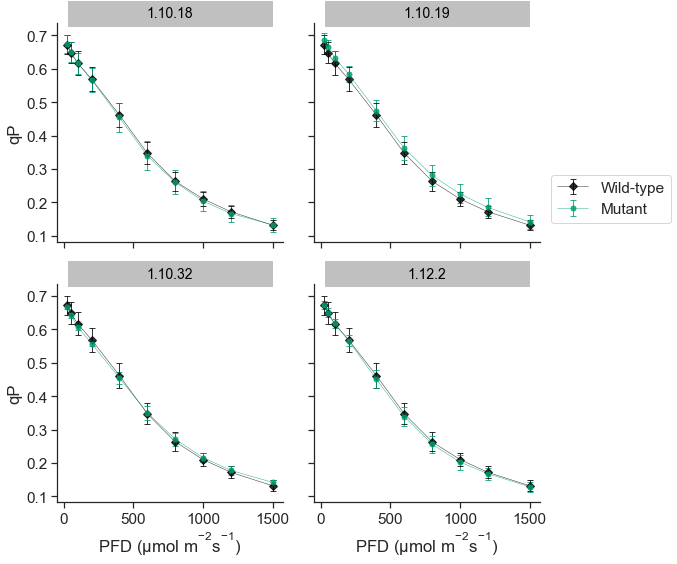

In [12]:
# qP
plot_curve(grouped_df, "qP_mean", "qP_std", "qP", "../figures/lrqpCurves.pdf")

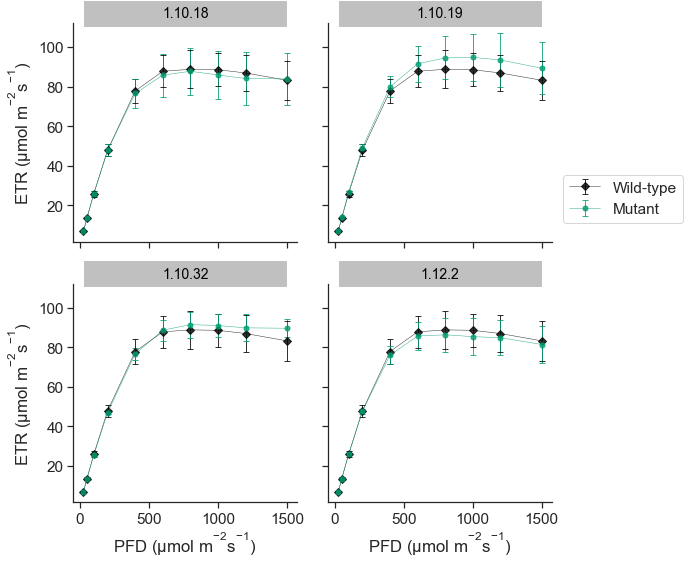

In [13]:
# ETR
plot_curve(grouped_df, "ETR_mean", "ETR_std", "ETR ($\mu$mol m$^{-2}$s$^{-1}$)", "../figures/lrETRCurves.pdf")

['wt_2' '1.10.19_1' '1.10.32_2' '1.10.18_2' '1.10.18_1' '1.12.2_2'
 '1.10.19_3' '1.12.2_3' '1.10.32_4' '1.10.18_4' '1.10.19_4' '1.12.2_5'
 'wt_4' '1.10.18_3' '1.12.2_4' 'wt_6' '1.10.18_5']


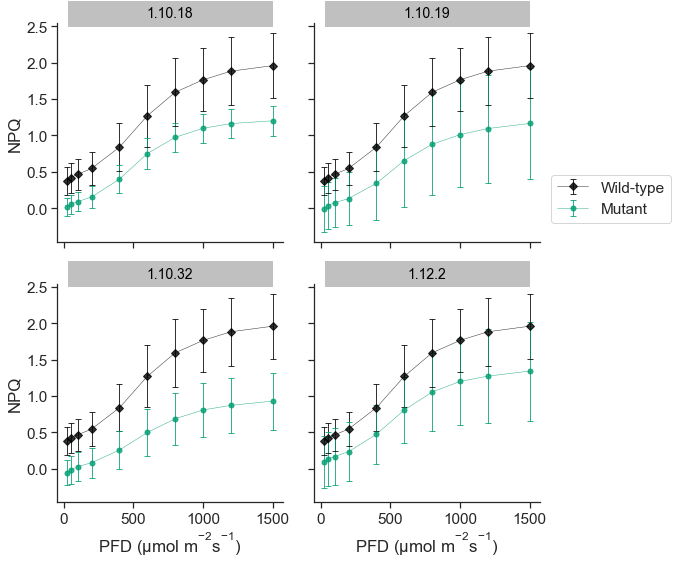

In [17]:
# NPQ

# Identify plants for which NPQ values were not successfully estimated across all data points
failed_samples = lr_df[lr_df['NPQ'] == -1]
failed_samples_list = failed_samples['plant'].unique()

# Remove those plants from the plot 
NPQ_df = lr_df[~lr_df['plant'].isin(failed_samples_list)]

# Print those plants that were included:
print(NPQ_df['plant'].unique())

# Re-group the resulting dataframe to plot NPQ vs PFD
grouped_NPQ_df = NPQ_df.groupby(['Q_rounded', 'plot', 'type']).agg({'NPQ': ['mean', 'std']})
grouped_NPQ_df.columns = ['NPQ_mean', 'NPQ_std']
grouped_NPQ_df = grouped_NPQ_df.reset_index()

plot_curve(grouped_NPQ_df, "NPQ_mean", "NPQ_std", "NPQ", "../figures/lrNPQCurves.pdf")

In [18]:
# Print failed NPQ/qN samples:
failed_samples = lr_df[lr_df['NPQ'] == -1]
failed_samples_list = failed_samples['plant'].unique()
print(failed_samples_list)

['1.10.32_1' 'wt_1' '1.12.2_1' '1.10.32_3' '1.10.32_5' 'wt_3']


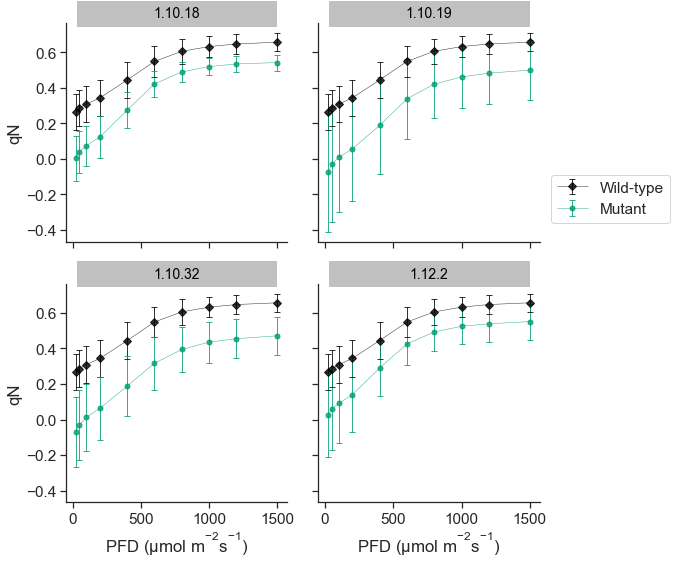

In [19]:
# qN

grouped_qN_df = grouped_df[grouped_df['Q_rounded'] != 0]

plot_curve(grouped_qN_df, "qN_mean", "qN_std", "qN", "../figures/lrqNCurves.pdf")

### Studying the dark to light transition

In [51]:
# Remove bad readings
transition_df = light_response_df[~light_response_df['plant'].isin(['1.10.19_5'])]

# Remove the first light measurment at the highest light level
transition_df = transition_df[~transition_df['which_1500'].isin(['first'])]

# Propagate NaNs for non-numerical values
transition_df['PhiPS2'] = pd.to_numeric(transition_df.PhiPS2, errors='coerce')
transition_df['ETR'] = pd.to_numeric(transition_df.ETR, errors='coerce')
transition_df['NPQ'] = pd.to_numeric(transition_df.NPQ, errors='coerce')
transition_df['qP'] = pd.to_numeric(transition_df.qP, errors='coerce')
transition_df['qN'] = pd.to_numeric(transition_df.qN, errors='coerce')

transition_df_grouped = transition_df.groupby(['Q_rounded', 'plot', 'type']).agg({'A': ['mean', 'std'], 'PhiPS2': ['mean', 'std'], 
                                                               'ETR': ['mean', 'std'], 'NPQ': ['mean', 'std'], 'qP': ['mean', 'std'],
                                                               'qN': ['mean', 'std']})

transition_df_grouped.columns = ['A_mean', 'A_std', 'PhiPS2_mean', 'PhiPS2_std', 'ETR_mean', 'ETR_std', 'NPQ_mean', 'NPQ_std', 'qP_mean', 'qP_std', 'qN_mean', 'qN_std']
transition_df_grouped = transition_df_grouped.reset_index()

/Users/rona/miniconda3/envs/relocalisations_C4/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


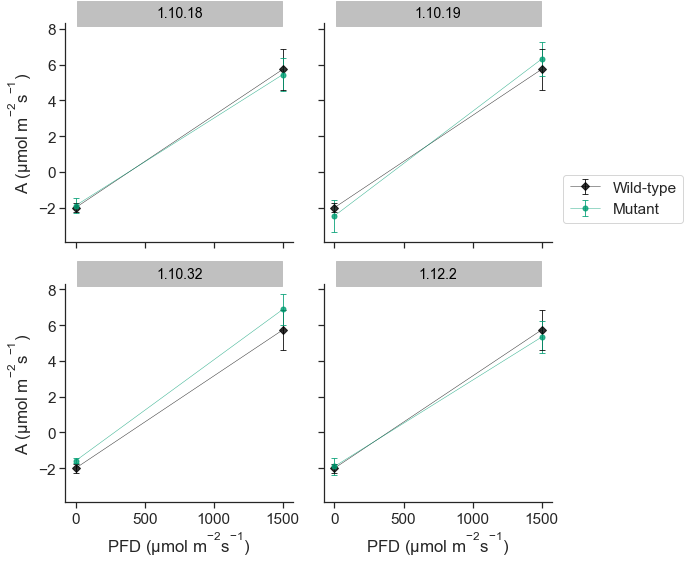

In [55]:
# Assimilation 
plot_curve(transition_df_grouped[(transition_df_grouped['Q_rounded'] == 1500) | (transition_df_grouped['Q_rounded'] == 0)], "A_mean", "A_std", "A ($\mu$mol m$^{-2}$s$^{-1}$)", "../figures/recoveryACurves.pdf")

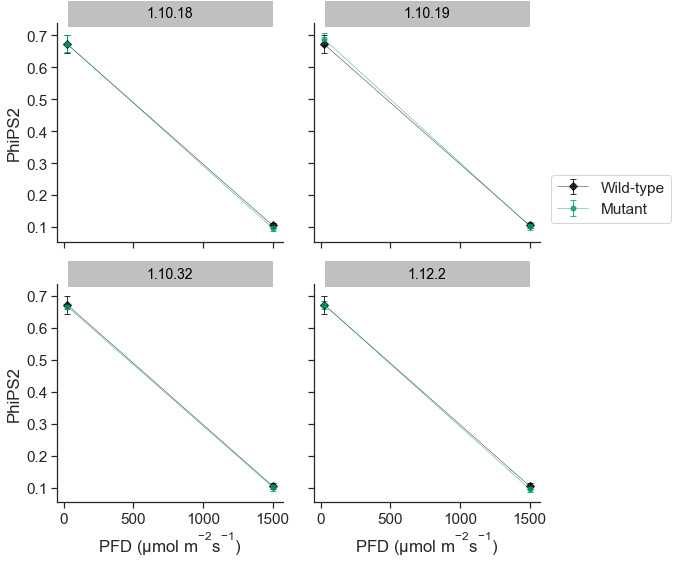

In [60]:
# PhiPS2
plot_curve(transition_df_grouped[(transition_df_grouped['Q_rounded'] == 1500) | (transition_df_grouped['Q_rounded'] == 25)], "PhiPS2_mean", "PhiPS2_std", "PhiPS2", "../figures/recoveryPhiPS2Curves.pdf")

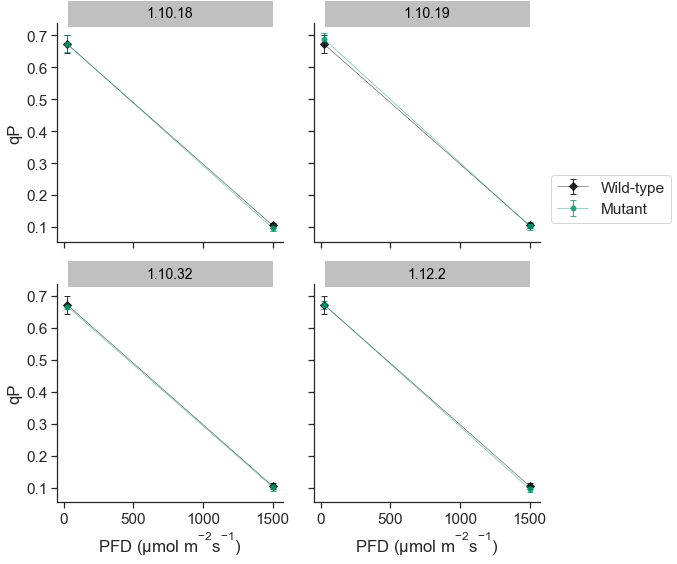

In [61]:
# qP
plot_curve(transition_df_grouped[(transition_df_grouped['Q_rounded'] == 1500) | (transition_df_grouped['Q_rounded'] == 25)], "qP_mean", "qP_std", "qP", "../figures/recoveryqpCurves.pdf")

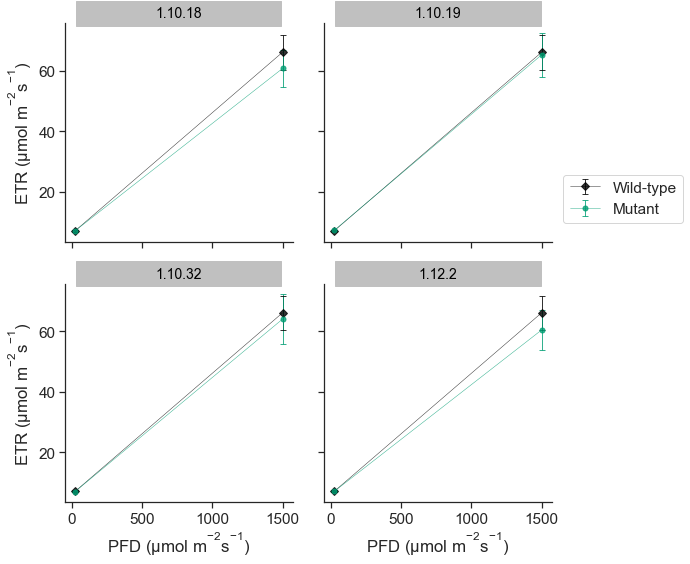

In [62]:
# ETR
plot_curve(transition_df_grouped[(transition_df_grouped['Q_rounded'] == 1500) | (transition_df_grouped['Q_rounded'] == 25)], "ETR_mean", "ETR_std", "ETR ($\mu$mol m$^{-2}$s$^{-1}$)", "../figures/recoveryETRCurves.pdf")

['wt_2' '1.10.19_1' '1.10.32_2' '1.10.18_2' '1.10.18_1' '1.12.2_2'
 '1.10.19_3' '1.12.2_3' '1.10.32_4' '1.10.18_4' '1.10.19_4' '1.12.2_5'
 'wt_4' '1.10.18_3' '1.12.2_4' 'wt_6' '1.10.18_5']


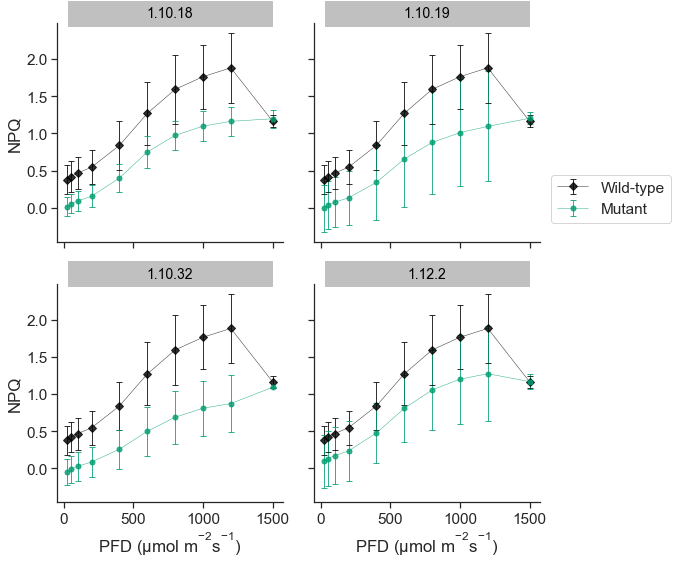

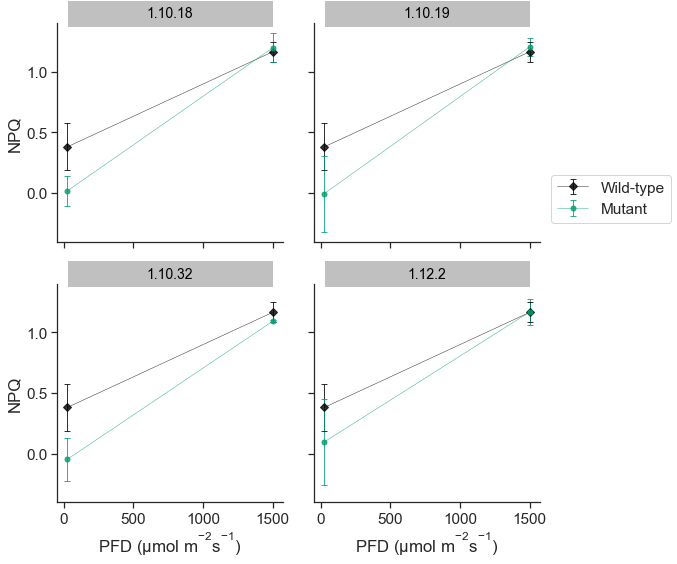

In [69]:
# NPQ

# Identify plants for which NPQ values were not successfully estimated across all data points
failed_samples = transition_df[transition_df['NPQ'] == -1]
failed_samples_list = failed_samples['plant'].unique()

# Remove those plants from the plot 
NPQ_df = transition_df[~transition_df['plant'].isin(failed_samples_list)]

# Print those plants that were included:
print(NPQ_df['plant'].unique())

# Re-group the resulting dataframe to plot NPQ vs PFD
grouped_NPQ_df = NPQ_df.groupby(['Q_rounded', 'plot', 'type']).agg({'NPQ': ['mean', 'std']})
grouped_NPQ_df.columns = ['NPQ_mean', 'NPQ_std']
grouped_NPQ_df = grouped_NPQ_df.reset_index()

# First a plot of the NPQ curve using the second measurement at 1500
plot_curve(grouped_NPQ_df, "NPQ_mean", "NPQ_std", "NPQ", "../figures/recoveryNPQCurves.pdf")

# Plot of just light at 25 and return to 1500
plot_curve(grouped_NPQ_df[(grouped_NPQ_df['Q_rounded'] == 1500) | (grouped_NPQ_df['Q_rounded'] == 25)], "NPQ_mean", "NPQ_std", "NPQ", "../figures/recoveryNPQCurves.pdf")

#### Calculation of changes in photosynthesis during the dark to light transition as a function of time

In [182]:
plants = transition_df['plant'].unique()
plants = list(plants)

plants.remove('1.12.2_1')

lines = []
types = []
T_1500 = []
T_0 = []
A_1500 = []
A_0 = []

for plant in plants:
    
    df_subset = transition_df[(transition_df['plant'] == plant) & (transition_df['plot'] == plant[:-2])]
    
    lines.append(plant[:-2])
    types.append(df_subset['type'].unique()[0])
    A_1500.append(df_subset[df_subset['Q_rounded'] == 1500]['A'].iloc[0])
    A_0.append(df_subset[df_subset['Q_rounded'] == 0]['A'].iloc[0])
    T_1500.append(df_subset[df_subset['Q_rounded'] == 1500]['TIME'].iloc[0])
    T_0.append(df_subset[df_subset['Q_rounded'] == 0]['TIME'].iloc[0])
#     A_recovery.append((A_1500 - A_0)/(T_1500 - T_0))
    
A_recovery_df = pd.DataFrame(list(zip(plants, lines, types, A_1500, A_0, T_1500, T_0)), columns =['Plant', 'Line', 'Type', 'A_1500', 'A_0', 'T_1500', 'T_0']) 
A_recovery_df['A_recovery'] = (A_recovery_df['A_1500'] - A_recovery_df['A_0'])/(A_recovery_df['T_1500'] - A_recovery_df['T_0'])

Text(0, 0.5, 'Change in assimilation\n (dark to light transition)')

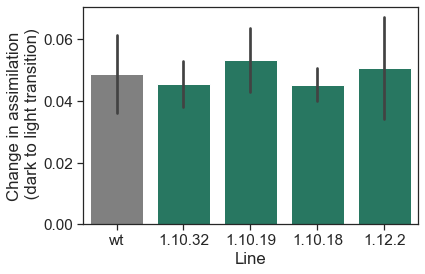

In [184]:
colours = ['gray', '#009E73']
ax = sns.barplot(x="Line", y="A_recovery", hue="Type", data=A_recovery_df, dodge=False, ci='sd', palette=colours, saturation=0.5)
ax.legend_.remove()
ax.set_ylabel('Change in assimilation\n (dark to light transition)')